# AI test notebook

Author: Anže Mramor

contact: anze.mramor@gmail.com

In [312]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Descriptive analysis

### 1. Import and review the dataset

In [313]:
# import the dataset
data = pd.read_csv('data/closing_odds.csv')
data

,match_id,league,match_date,home_team,home_score,away_team,away_score,avg_odds_home_win,avg_odds_draw,avg_odds_away_win,max_odds_home_win,max_odds_draw,max_odds_away_win,top_bookie_home_win,top_bookie_draw,top_bookie_away_win,n_odds_home_win,n_odds_draw,n_odds_away_win
0,170088,England: Premier League,2005-01-01,Liverpool,0,Chelsea,1,2.9944,3.1944,2.2256,3.20,3.25,2.29,Paddy Power,Sportingbet,Expekt,9,9,9
1,170089,England: Premier League,2005-01-01,Fulham,3,Crystal Palace,1,1.9456,3.2333,3.6722,2.04,3.30,4.15,Pinnacle Sports,bet-at-home,Expekt,9,9,9
2,170090,England: Premier League,2005-01-01,Aston Villa,1,Blackburn,0,1.8522,3.2611,4.0144,2.00,3.40,4.50,Pinnacle Sports,Paddy Power,Sportingbet,9,9,9
3,170091,England: Premier League,2005-01-01,Bolton,1,West Brom,1,1.6122,3.4133,5.4722,1.67,3.57,6.27,Coral,Pinnacle Sports,Pinnacle Sports,9,9,9
4,170092,England: Premier League,2005-01-01,Charlton,1,Arsenal,3,5.9878,3.4778,1.5567,7.00,3.60,1.62,Expekt,Paddy Power,bet365,9,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479435,876806,World: Club Friendly,2015-06-30,St. Gallen,1,Wacker Innsbruck,2,1.6838,3.8846,3.9813,1.83,4.20,4.33,188BET,bet365,Ladbrokes,24,24,24
479436,876807,World: Club Friendly,2015-06-30,SW Harelbeke,1,Waregem,1,13.1165,7.8229,1.1053,19.00,9.00,1.13,BetVictor,bet365,Titanbet,17,17,17
479437,876808,World: Club Friendly,2015-06-30,Torhout,0,Club Brugge,5,17.2256,12.6231,1.0288,22.00,15.00,1.05,BetVictor,Jetbull,BetVictor,16,16,16
479438,876809,World: Club Friendly,2015-06-30,Tournai,0,Mouscron Peruwelz,3,15.7143,10.2857,1.0614,34.00,12.00,1.10,Sportingbet,Betclic,Paddy Power,7,7,7


First we obtain some general information about the dataset and check for missing values.

In [314]:
# obtain general information about dataset
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479440 entries, 0 to 479439
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   match_id             479440 non-null  int64  
 1   league               479440 non-null  object 
 2   match_date           479440 non-null  object 
 3   home_team            479440 non-null  object 
 4   home_score           479440 non-null  int64  
 5   away_team            479440 non-null  object 
 6   away_score           479440 non-null  int64  
 7   avg_odds_home_win    479440 non-null  float64
 8   avg_odds_draw        479440 non-null  float64
 9   avg_odds_away_win    479440 non-null  float64
 10  max_odds_home_win    479440 non-null  float64
 11  max_odds_draw        479440 non-null  float64
 12  max_odds_away_win    479440 non-null  float64
 13  top_bookie_home_win  479412 non-null  object 
 14  top_bookie_draw      479440 non-null  object 
 15  top_bookie_away_w

,match_id,home_score,away_score,avg_odds_home_win,avg_odds_draw,avg_odds_away_win,max_odds_home_win,max_odds_draw,max_odds_away_win,n_odds_home_win,n_odds_draw,n_odds_away_win
count,479440.000000,479440.000000,479440.000000,479440.000000,479440.000000,479440.000000,479440.00000,479440.000000,479440.000000,479440.000000,479440.000000,479440.000000
mean,551864.649009,1.538735,1.200192,2.524875,3.669993,3.974709,2.78930,3.941587,4.573031,16.453948,16.455312,16.454564
std,195079.534253,1.379154,1.245997,1.944906,1.069718,2.786158,2.75642,1.458651,4.247879,8.824646,8.824219,8.824570
min,170088.000000,0.000000,0.000000,0.000000,1.010000,0.000000,0.00000,1.010000,0.000000,0.000000,1.000000,0.000000
25%,394532.500000,1.000000,0.000000,1.657700,3.200000,2.418300,1.75000,3.300000,2.580000,9.000000,9.000000,9.000000
50%,566276.500000,1.000000,1.000000,2.083600,3.360900,3.200000,2.20000,3.560000,3.500000,17.000000,17.000000,17.000000
75%,715668.500000,2.000000,2.000000,2.642500,3.734500,4.606850,2.85000,4.000000,5.200000,25.000000,25.000000,25.000000
max,876812.000000,101.000000,102.000000,151.000000,51.000000,103.024000,209.04000,150.000000,501.000000,29.000000,29.000000,29.000000


In [315]:
# check for missing values
print(data.isnull().sum())
data.isnull().mean() * 100

match_id                0
league                  0
match_date              0
home_team               0
home_score              0
away_team               0
away_score              0
avg_odds_home_win       0
avg_odds_draw           0
avg_odds_away_win       0
max_odds_home_win       0
max_odds_draw           0
max_odds_away_win       0
top_bookie_home_win    28
top_bookie_draw         0
top_bookie_away_win    24
n_odds_home_win         0
n_odds_draw             0
n_odds_away_win         0
dtype: int64


match_id               0.000000
league                 0.000000
match_date             0.000000
home_team              0.000000
home_score             0.000000
away_team              0.000000
away_score             0.000000
avg_odds_home_win      0.000000
avg_odds_draw          0.000000
avg_odds_away_win      0.000000
max_odds_home_win      0.000000
max_odds_draw          0.000000
max_odds_away_win      0.000000
top_bookie_home_win    0.005840
top_bookie_draw        0.000000
top_bookie_away_win    0.005006
n_odds_home_win        0.000000
n_odds_draw            0.000000
n_odds_away_win        0.000000
dtype: float64

In [316]:
# rows with missing values
missing_values = data[data.isnull().any(axis=1)]
missing_values

,match_id,league,match_date,home_team,home_score,away_team,away_score,avg_odds_home_win,avg_odds_draw,avg_odds_away_win,max_odds_home_win,max_odds_draw,max_odds_away_win,top_bookie_home_win,top_bookie_draw,top_bookie_away_win,n_odds_home_win,n_odds_draw,n_odds_away_win
7761,188788,Singapore: S-League,2005-05-19,Home Utd,0,Warriors,1,0.00,3.50,3.40,0.0,3.50,3.4,NaN,bwin,bwin,0,1,1
7762,188789,Singapore: S-League,2005-05-19,Tampines,1,Young Lions,0,0.00,3.75,6.00,0.0,3.75,6.0,NaN,bwin,bwin,0,1,1
9140,192445,Singapore: S-League,2005-06-24,Woodlands W.,2,Young Lions,2,0.00,3.75,5.00,0.0,3.75,5.0,NaN,bwin,bwin,0,1,1
234040,559175,Denmark: Elitedivisionen Women,2011-11-12,Skovbakken W,9,Taastrup W,1,0.00,18.00,30.00,0.0,18.00,30.0,NaN,bet365,bet365,0,1,1
243054,570308,World: Olympic Games Women,2012-01-21,Dominican Republic W,0,USA W,14,151.00,34.00,0.00,151.0,34.00,0.0,bet365,bet365,NaN,1,1,0
243382,570692,World: Olympic Games Women,2012-01-22,Mexico W,7,Dominican Republic W,0,0.00,41.00,101.00,0.0,41.00,101.0,NaN,bet365,bet365,0,1,1
243441,570761,World: Olympic Games Women,2012-01-23,USA W,13,Guatemala W,0,0.00,41.00,101.00,0.0,41.00,101.0,NaN,bet365,bet365,0,1,1
256289,587118,Europe: EURO Women,2012-04-01,Armenia W,2,Austria W,4,29.00,10.50,0.00,29.0,10.50,0.0,Betsson,Betsson,NaN,1,1,0
276278,612643,Denmark: Elitedivisionen Women,2012-08-11,Vejle W,0,Brondby W,4,30.00,18.00,0.00,30.0,18.00,0.0,bet365,bet365,NaN,1,1,0
277039,613589,Europe: Champions League Women,2012-08-13,Raciborz W,7,Ekonomist W,1,0.00,21.00,51.00,0.0,21.00,51.0,NaN,bet365,bet365,0,1,1


Only 2 variables ('top_bookie_home_win' and 'top_bookie_away_win') contain cases of missing values. Rows with missing values in those columns correspond to zero-values in the columns 'max_odds_home_win' and 'max_odds_away_win', meaning that there cannot be a top bookie for a given match and given result as none of the bookies provided odds for the given match. Provided that all of the rows containing missing values represent only approximately 1 % of all of the data, which is relatively low percantage and won't affect our predictive model significantly, we will probably remove those later when constructing the model.

We further check for unique values and duplicated rows.

In [317]:
# check the number of unique values per variable
data.nunique()

match_id               479440
league                    818
match_date               3830
home_team               10131
home_score                 23
away_team                9442
away_score                 19
avg_odds_home_win       50935
avg_odds_draw           37683
avg_odds_away_win       78240
max_odds_home_win        1484
max_odds_draw            1046
max_odds_away_win        2228
top_bookie_home_win        29
top_bookie_draw            29
top_bookie_away_win        29
n_odds_home_win            30
n_odds_draw                29
n_odds_away_win            30
dtype: int64

In [318]:
# check the number of duplicated rows
data.duplicated().sum()
duplicated_rows = data[data.duplicated()]
duplicated_rows

,match_id,league,match_date,home_team,home_score,away_team,away_score,avg_odds_home_win,avg_odds_draw,avg_odds_away_win,max_odds_home_win,max_odds_draw,max_odds_away_win,top_bookie_home_win,top_bookie_draw,top_bookie_away_win,n_odds_home_win,n_odds_draw,n_odds_away_win


There is significant amount of unique values in categorical values such as league and home/away_team which might cause problems for the transformation of categorical variables into numerical for our model.
There are no duplicated values in the dataset.

### 2. Visualization of the data

Below we plot the number of matches per league.

In [319]:
# number of matches per league
matches_per_league = data['league'].value_counts()
matches_per_league

World: Club Friendly                14106
England: League Two                  5283
England: League One                  5277
England: Championship                5260
World: Friendly International        5105
                                    ...  
Tanzania: Ligi Kuu Bara                 1
Northern Ireland: Charity Shield        1
China: Yi League                        1
Armenia: Super Cup                      1
Côte d'Ivoire: Ligue 1                  1
Name: league, Length: 818, dtype: int64

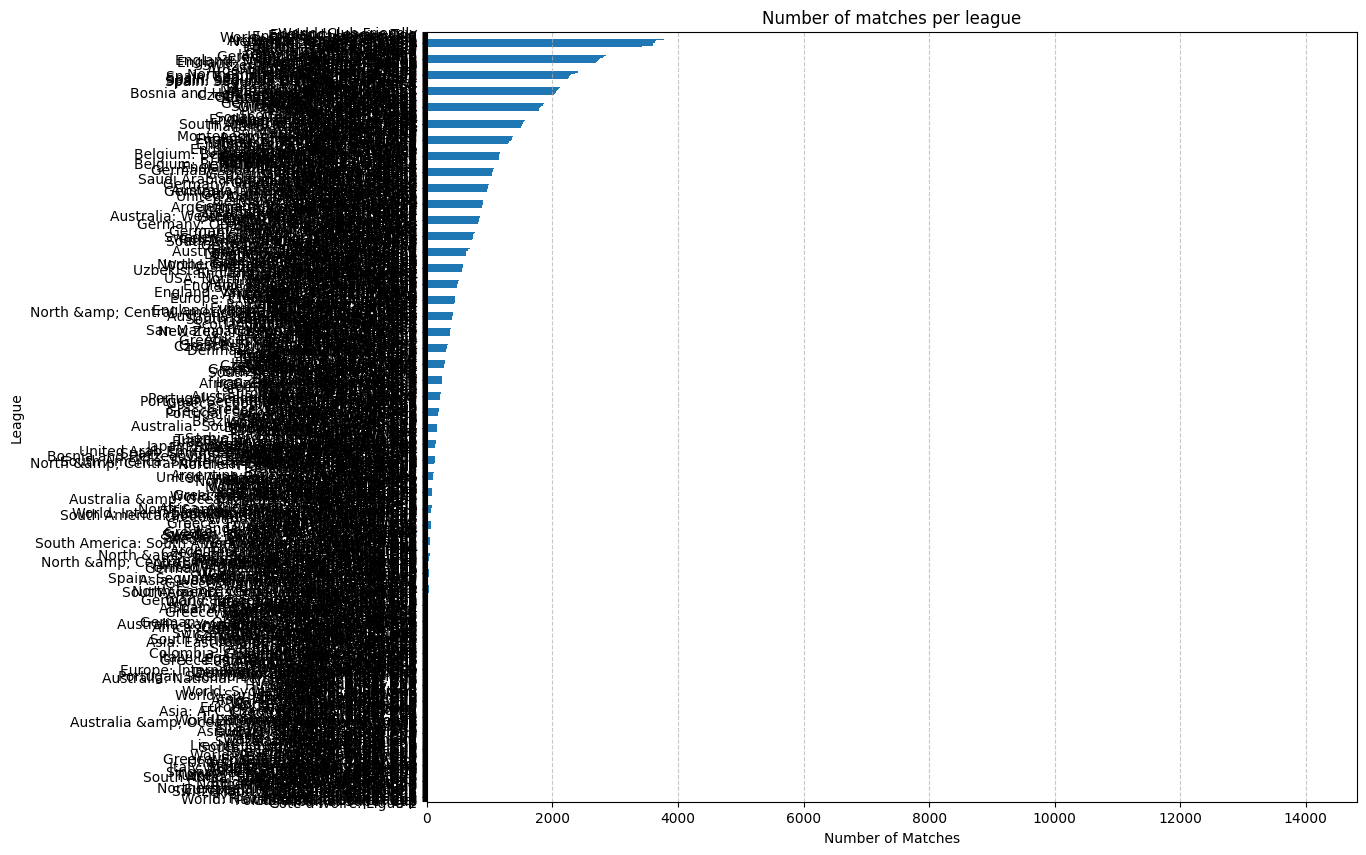

In [320]:
plt.figure(figsize=(12, 10))
matches_per_league.sort_values().plot(kind='barh', width=0.5)

plt.xlabel("Number of Matches")
plt.ylabel("League")
plt.title("Number of matches per league")
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

As there are more than 800 unique leagues in the dataset, above graph isn't suitable for finding out which are the top leagues by number of matches, however it nicely shows the distribution of number of the matches.

Below we depict the top 50 leagues with the most matches.

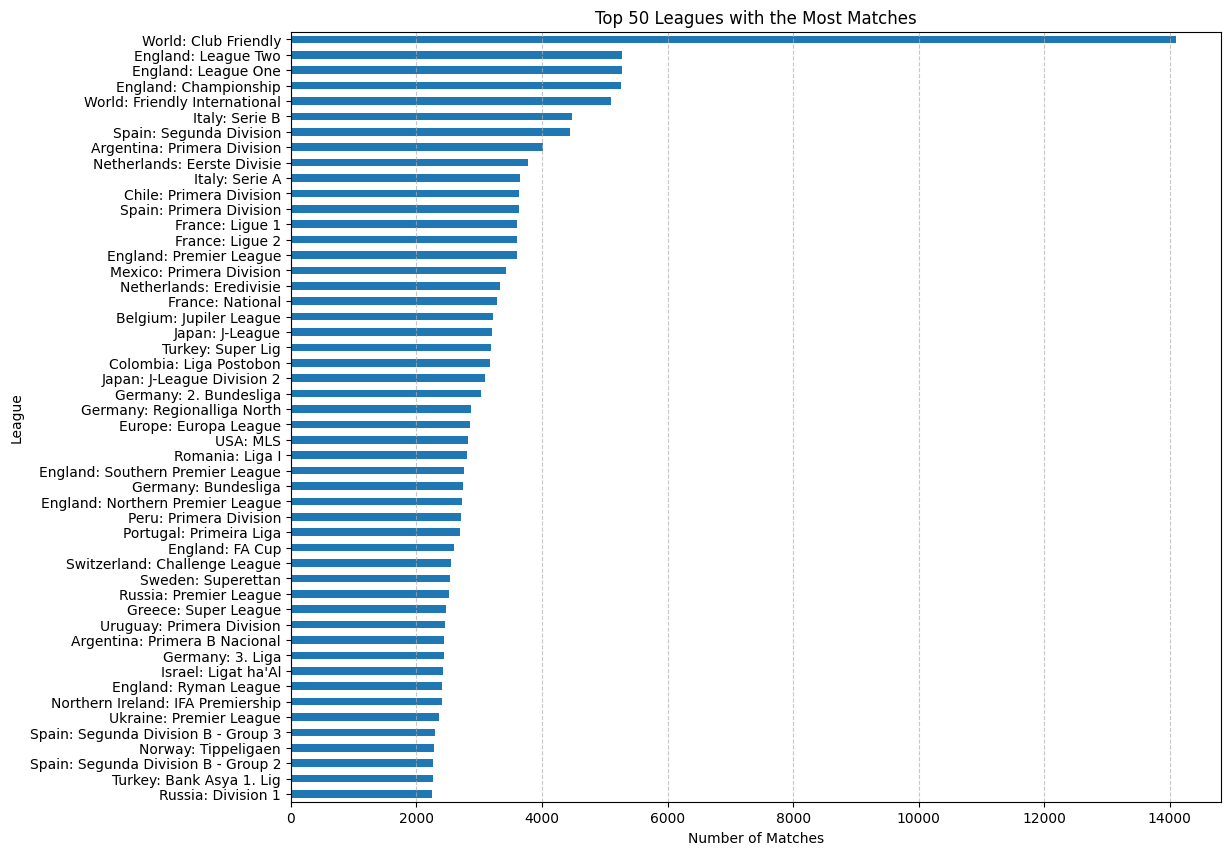

In [321]:
# select only top 50 leagues with most matches
top_50_leagues = matches_per_league.nlargest(50)

plt.figure(figsize=(12, 10))
top_50_leagues.sort_values().plot(kind='barh', width=0.5)

plt.xlabel("Number of Matches")
plt.ylabel("League")
plt.title("Top 50 Leagues with the Most Matches")
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

We can notice that majority of leagues where the total number of matches played is the largest are European leagues. In all of the leagues with the most number of matches at least 2000 matches were played.
Below we calculate and plot the average number of matches per season per league.

In [322]:
data['match_date'] = pd.to_datetime(data['match_date'])
data['season'] =  data['match_date'].dt.year
matches_per_season = data.groupby(['league', 'season']).size()
avg_matches_per_league = matches_per_season.groupby('league').mean()
avg_matches_per_league

league
Africa: Africa Cup of Nations            66.714286
Africa: African Championship Women       10.500000
Africa: African Nations Championship     15.400000
Africa: CAF African Championship U17      8.500000
Africa: CAF African Championship U20     12.666667
                                           ...    
World: World Cup Women U20               31.000000
World: World Football Challenge           8.250000
World: Zayton Cup                         6.000000
Yemen: Division 1                       123.333333
Zambia: Super League                      1.000000
Length: 818, dtype: float64

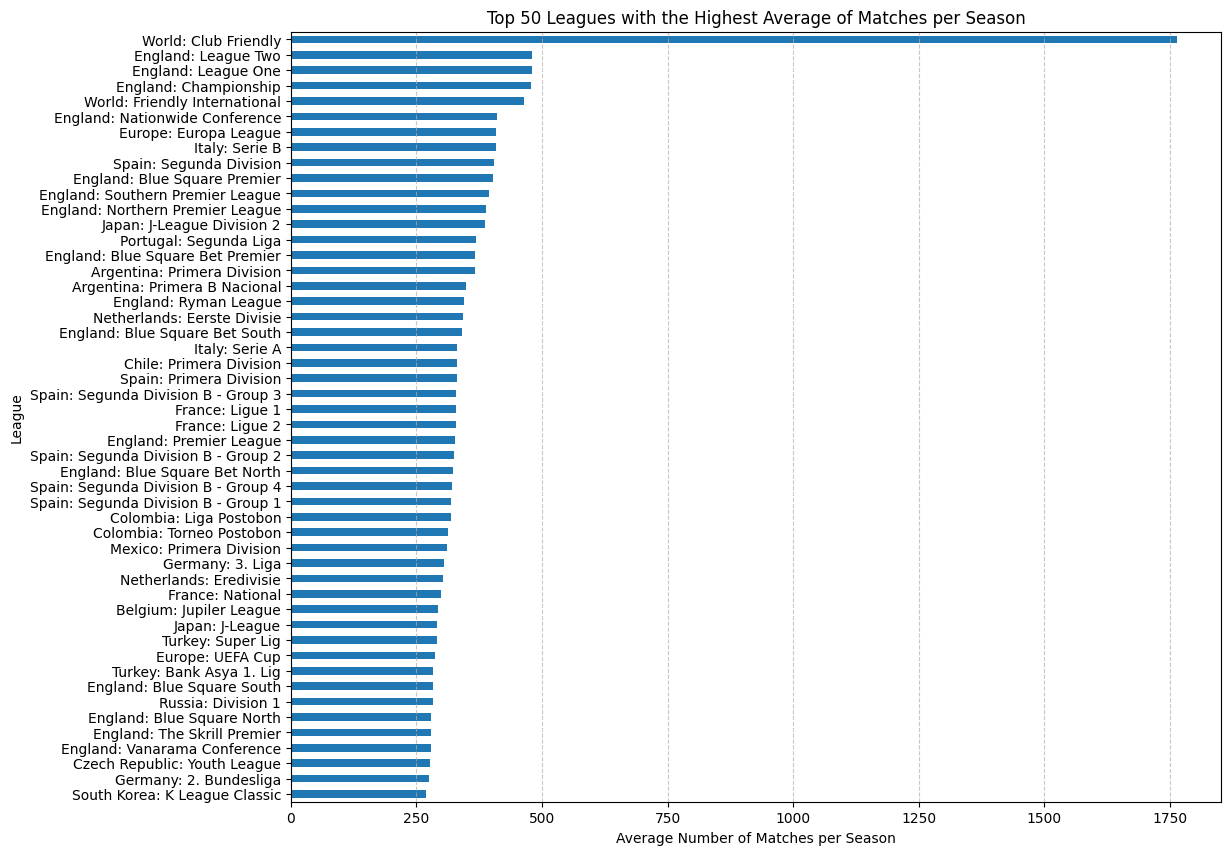

In [323]:
# select only top 50 leagues with most matches
top_50_leagues_avg = avg_matches_per_league.nlargest(50)

plt.figure(figsize=(12, 10))
top_50_leagues_avg.sort_values().plot(kind='barh', width=0.5)

plt.xlabel("Average Number of Matches per Season")
plt.ylabel("League")
plt.title("Top 50 Leagues with the Highest Average of Matches per Season")
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

The leagues in the top 50 by average number of matches remained approximately the same. We can notice that the majority of the top 50 leagues host at least 250 games in an average season.

Below we show the number of matches by day and month. Obvious seasonality that is typical in sports like football can be seen.

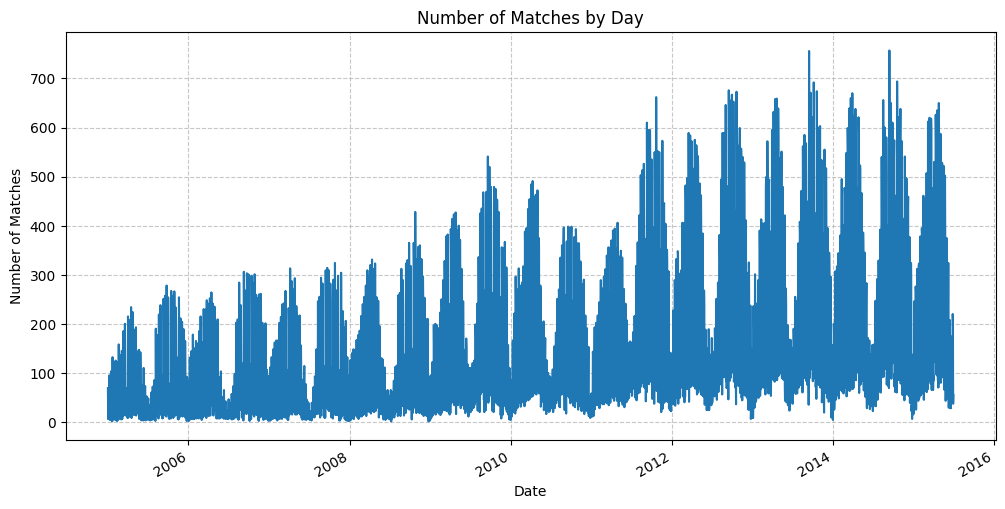

In [324]:
# Plot the number of matches per day
matches_per_day = data['match_date'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
matches_per_day.plot(kind='line')

plt.xlabel("Date")
plt.ylabel("Number of Matches")
plt.title("Number of Matches by Day")
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

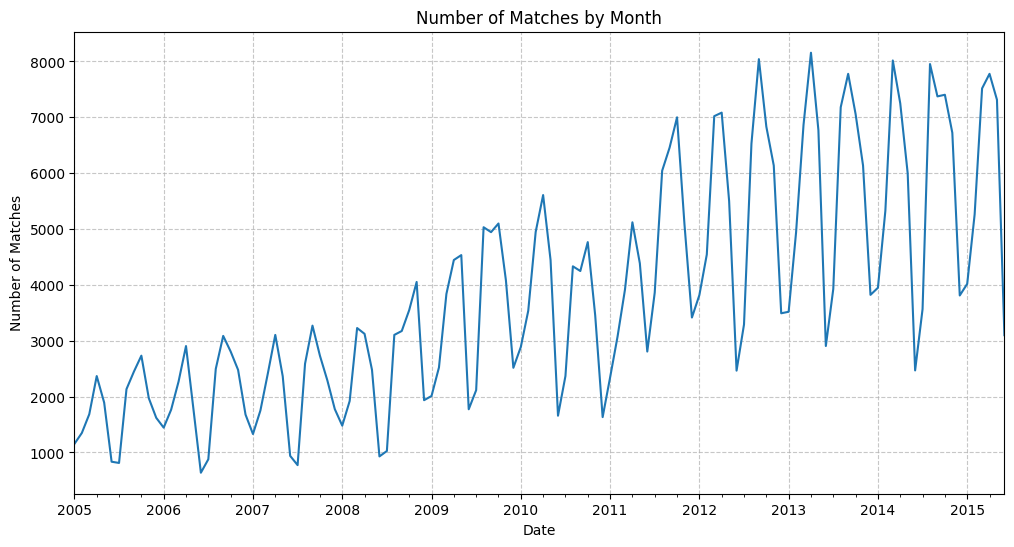

In [325]:
# Plot number of matches by month
matches_per_month = data.resample('M', on='match_date').size()

plt.figure(figsize=(12, 6))
matches_per_month.plot(kind='line')

plt.xlabel("Date")
plt.ylabel("Number of Matches")
plt.title("Number of Matches by Month")
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

Below we plot the distributions of total average odds and maximum odds and odds trend over time.

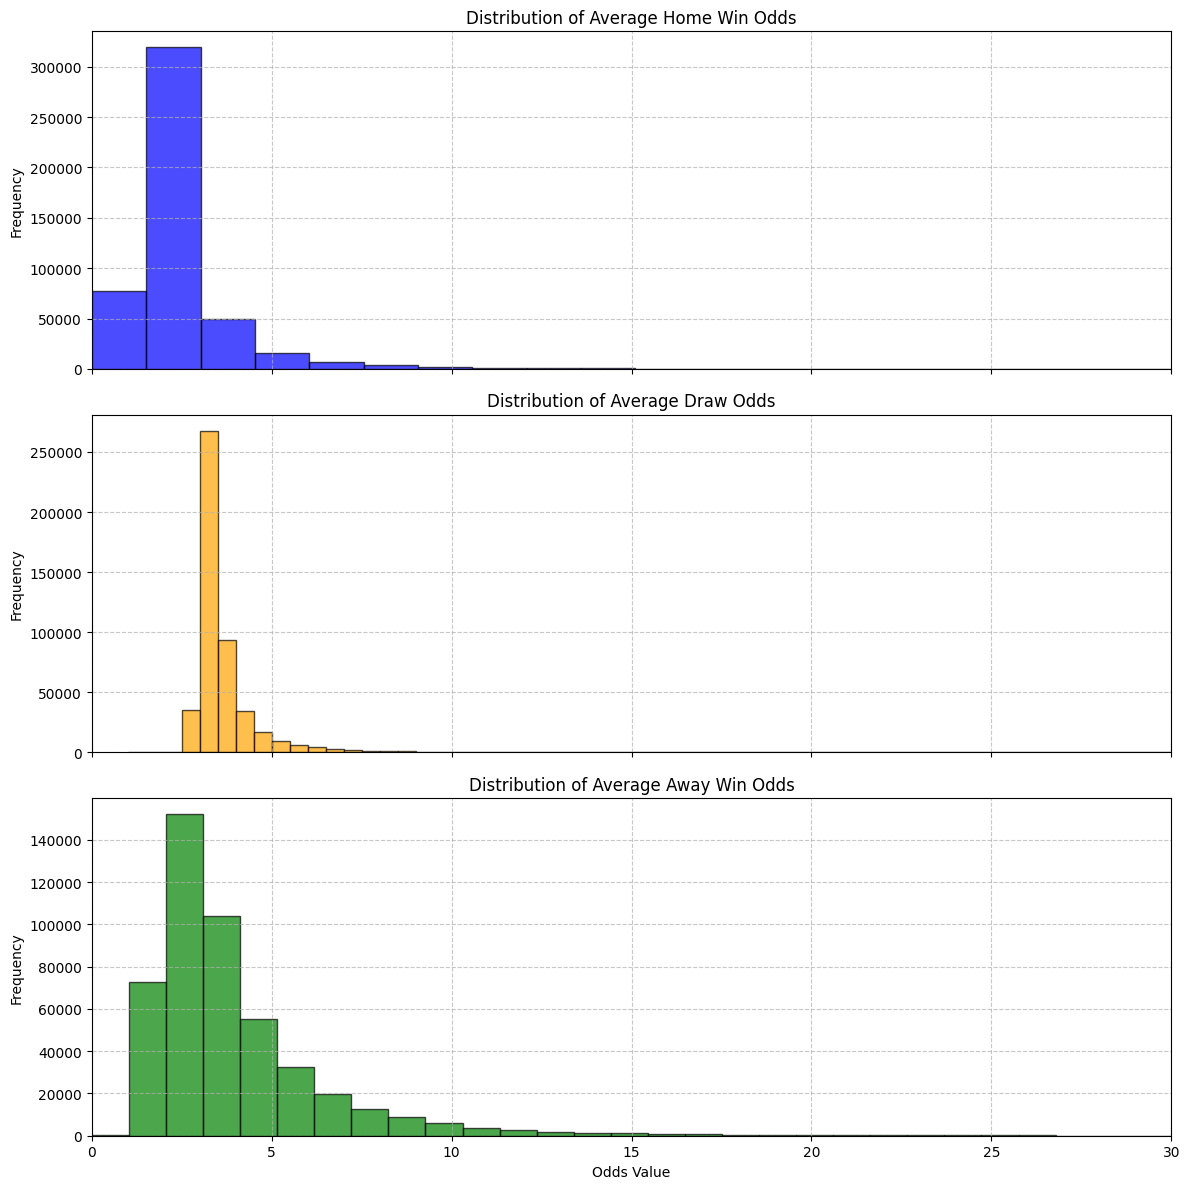

In [326]:
# Plot subplots for each type of average odds
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# vars
bins = 100
x_min = 0
x_max = 30

# home win odds
axes[0].hist(data['avg_odds_home_win'], bins=bins, alpha=0.7, color='blue', edgecolor='black')
axes[0].set_title("Distribution of Average Home Win Odds")
axes[0].set_ylabel("Frequency")
axes[0].set_xlim(x_min, x_max)
axes[0].grid(True, linestyle='--', alpha=0.7)

# draw odds
axes[1].hist(data['avg_odds_draw'], bins=bins, alpha=0.7, color='orange', edgecolor='black')
axes[1].set_title("Distribution of Average Draw Odds")
axes[1].set_ylabel("Frequency")
axes[1].set_xlim(x_min, x_max)
axes[1].grid(True, linestyle='--', alpha=0.7)

# away odds
axes[2].hist(data['avg_odds_away_win'], bins=bins, alpha=0.7, color='green', edgecolor='black')
axes[2].set_title("Distribution of Average Away Win Odds")
axes[2].set_xlabel("Odds Value")
axes[2].set_ylabel("Frequency")
axes[2].set_xlim(x_min, x_max)
axes[2].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

We can observe that all types of average odds take an approximate right-skewed normal distribution, all with majority of odds values below 15. This makes sense, because teams in a single League are usually comparable among eachother, meaning that high values of odds are relatively rare. On the other hand, lower values of odds are more common, however they are never lower than 1 (as that would mean that the probability of the result is higher than 1 which is impossible). What is also interesting to observe is that lowest value of odds for the draw are significantly higher than the other two results.

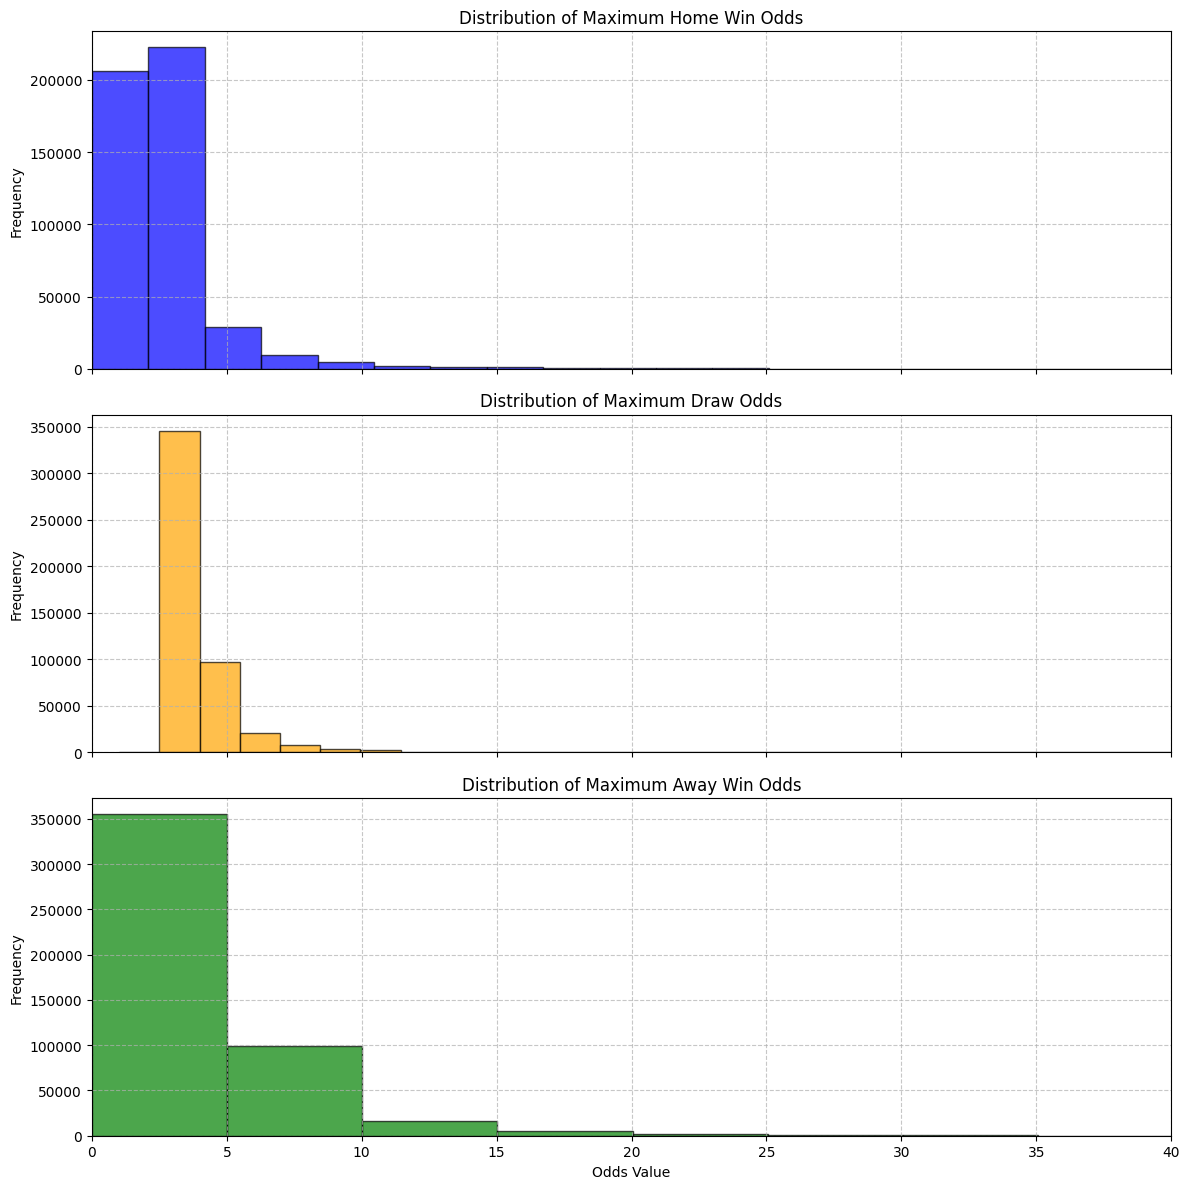

In [327]:
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

x_max = 40

# home win odds
axes[0].hist(data['max_odds_home_win'], bins=bins, alpha=0.7, color='blue', edgecolor='black')
axes[0].set_title("Distribution of Maximum Home Win Odds")
axes[0].set_ylabel("Frequency")
axes[0].set_xlim(x_min, x_max)
axes[0].grid(True, linestyle='--', alpha=0.7)

# draw odds
axes[1].hist(data['max_odds_draw'], bins=bins, alpha=0.7, color='orange', edgecolor='black')
axes[1].set_title("Distribution of Maximum Draw Odds")
axes[1].set_ylabel("Frequency")
axes[1].set_xlim(x_min, x_max)
axes[1].grid(True, linestyle='--', alpha=0.7)

# away odds
axes[2].hist(data['max_odds_away_win'], bins=bins, alpha=0.7, color='green', edgecolor='black')
axes[2].set_title("Distribution of Maximum Away Win Odds")
axes[2].set_xlabel("Odds Value")
axes[2].set_ylabel("Frequency")
axes[2].set_xlim(x_min, x_max)
axes[2].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

For the distributions of maximum odds we can observe similar patterns as for average odds, with the exception that their values seem to be exponentially distributed in contrast to normal distribution from average odds. This again makes sense, as values in this set are maximum values instead of normalized averages as before.

On the plots below we show the trend of all the different results odds for average and maximum odds over time. For each result we calculated monthly averages of the odds.

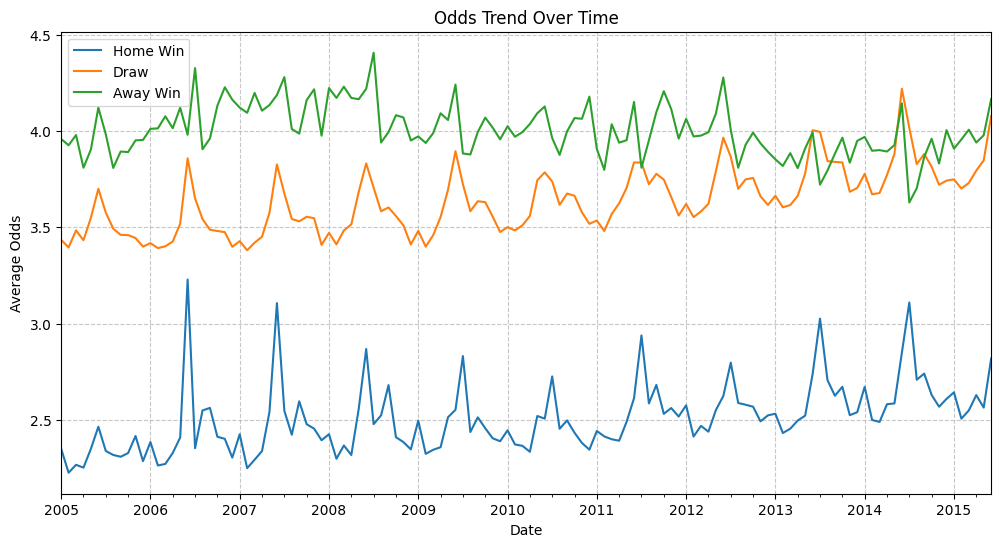

In [328]:
plt.figure(figsize=(12, 6))
data.resample('M', on='match_date')[['avg_odds_home_win', 'avg_odds_draw', 'avg_odds_away_win']].mean().plot(ax=plt.gca())
plt.xlabel("Date")
plt.ylabel("Average Odds")
plt.title("Odds Trend Over Time")
plt.legend(["Home Win", "Draw", "Away Win"])
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

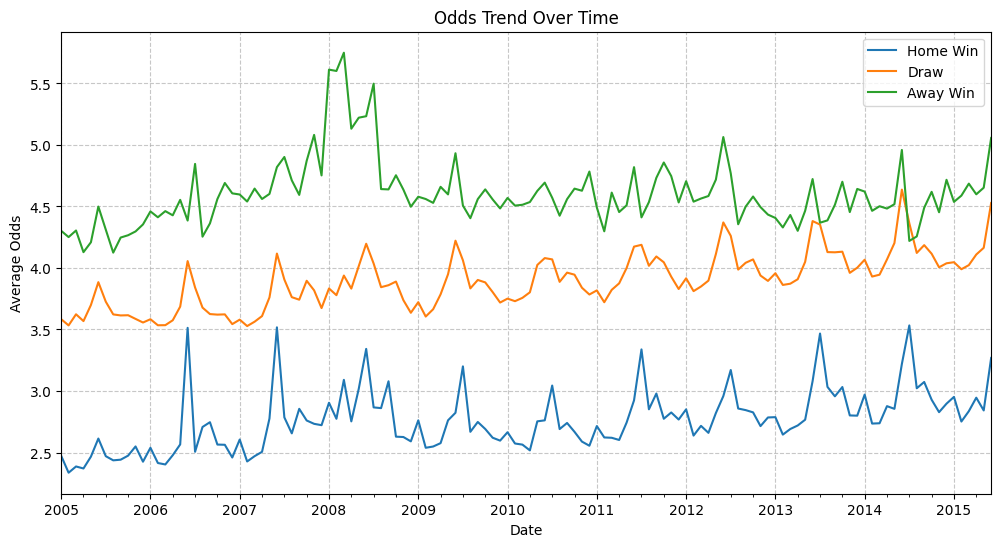

In [329]:
plt.figure(figsize=(12, 6))
data.resample('M', on='match_date')[['max_odds_home_win', 'max_odds_draw', 'max_odds_away_win']].mean().plot(ax=plt.gca())
plt.xlabel("Date")
plt.ylabel("Average Odds")
plt.title("Odds Trend Over Time")
plt.legend(["Home Win", "Draw", "Away Win"])
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

On both graphs we can notice that home win odds are historically lower than draw odds, which are generally lower than away odds. This means that bookies believe that the place where the match takes place plays a significant part in the result of the match. We can also observe a clear seasonal component - odds dropping at the start of the year and skyrocketing just before the summer - which is when final matches in most of the Leagues are usually played. There also be a small historic linear trend across the whole observed period - averages of average and maximum odds gained approximately 0.5 points during the observation period. 

Below we plot the boxplots of odds distribution per team in English Premier League.

In [330]:
# Create new table for english premier league
epl_df = data[data['league'] == "England: Premier League"]

teams = pd.concat([epl_df[['home_team', 'avg_odds_home_win', 'avg_odds_draw', 'avg_odds_away_win']].rename(
                        columns={'home_team': 'team'}),
                   epl_df[['away_team', 'avg_odds_home_win', 'avg_odds_draw', 'avg_odds_away_win']].rename(
                        columns={'away_team': 'team'})])

odds_melted = teams.reset_index(drop = True).melt(id_vars="team", var_name="Odds Type", value_name="Average Odds")
odds_melted


,team,Odds Type,Average Odds
0,Liverpool,avg_odds_home_win,2.9944
1,Fulham,avg_odds_home_win,1.9456
2,Aston Villa,avg_odds_home_win,1.8522
3,Bolton,avg_odds_home_win,1.6122
4,Charlton,avg_odds_home_win,5.9878
...,...,...,...
21607,Manchester United,avg_odds_away_win,2.2407
21608,QPR,avg_odds_away_win,6.2300
21609,Southampton,avg_odds_away_win,5.3117
21610,West Ham,avg_odds_away_win,4.5879


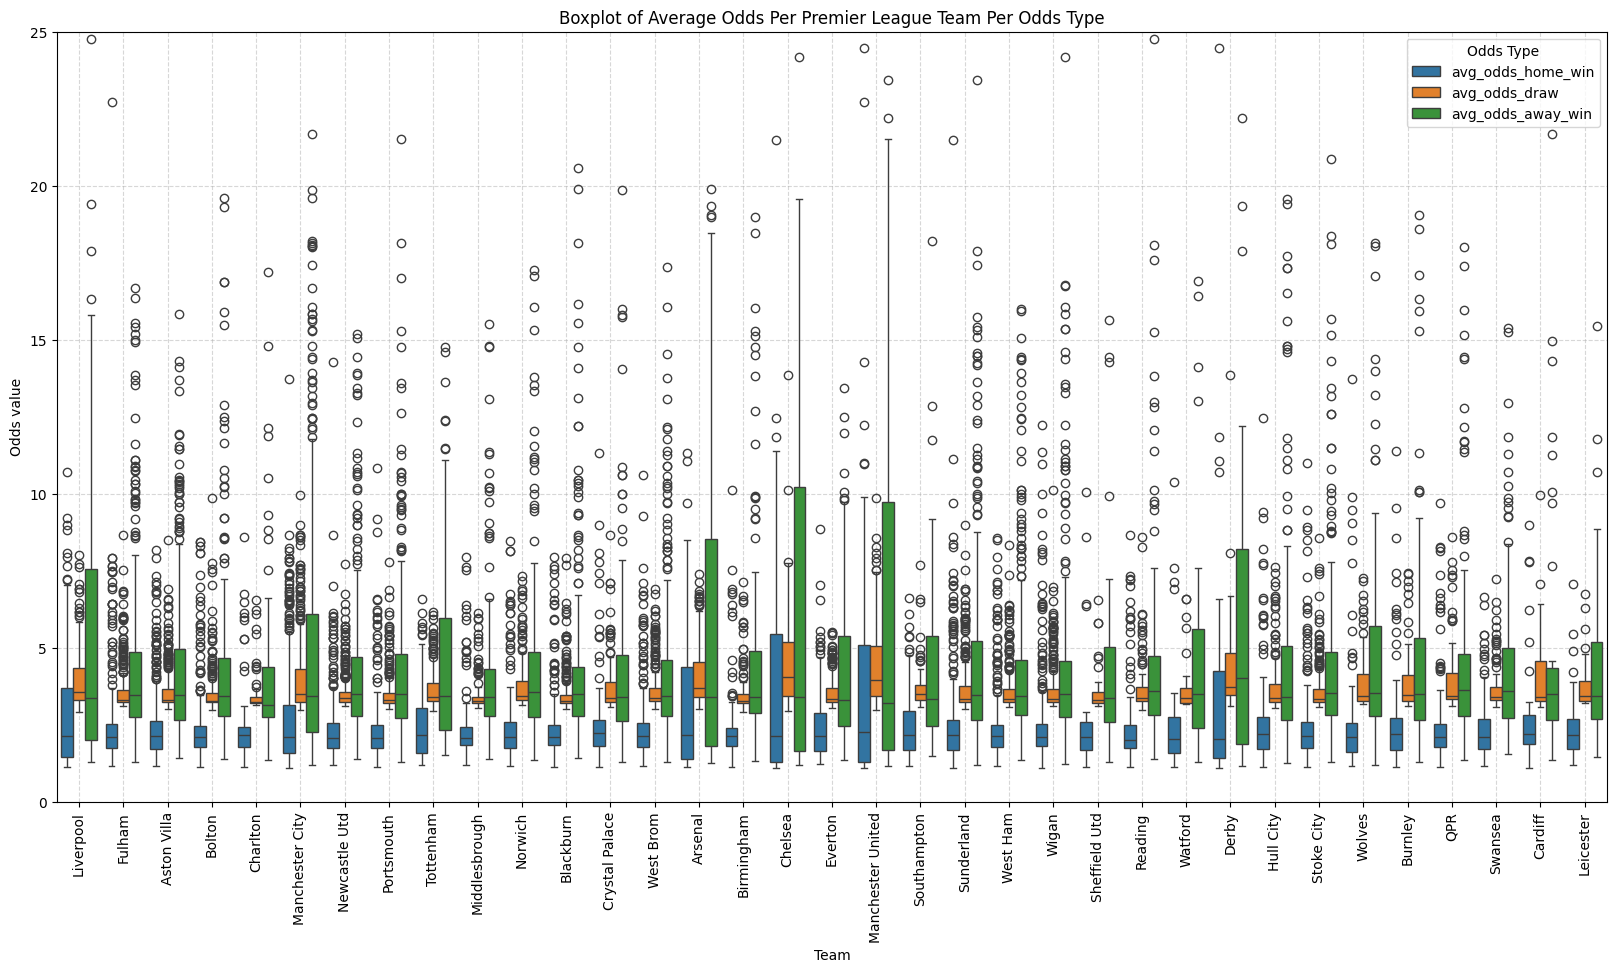

In [331]:
# Plot the data
y_min = 0
y_max = 25

plt.figure(figsize=(20, 10))
sns.boxplot(data=odds_melted, x="team", y="Average Odds", hue="Odds Type")

plt.xticks(rotation=90)
plt.xlabel("Team")
plt.ylabel("Odds value")
plt.title("Boxplot of Average Odds Per Premier League Team Per Odds Type")
plt.legend(title="Odds Type")
plt.ylim(y_min, y_max)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

In [332]:
# Create new table for max odds

teams_max = pd.concat([epl_df[['home_team', 'max_odds_home_win', 'max_odds_draw', 'max_odds_away_win']].rename(
                        columns={'home_team': 'team'}),
                   epl_df[['away_team', 'max_odds_home_win', 'max_odds_draw', 'max_odds_away_win']].rename(
                        columns={'away_team': 'team'})])

odds_melted_max = teams_max.reset_index(drop = True).melt(id_vars="team", var_name="Odds Type", value_name="Maximum Odds")
odds_melted_max

,team,Odds Type,Maximum Odds
0,Liverpool,max_odds_home_win,3.20
1,Fulham,max_odds_home_win,2.04
2,Aston Villa,max_odds_home_win,2.00
3,Bolton,max_odds_home_win,1.67
4,Charlton,max_odds_home_win,7.00
...,...,...,...
21607,Manchester United,max_odds_away_win,2.30
21608,QPR,max_odds_away_win,7.00
21609,Southampton,max_odds_away_win,6.00
21610,West Ham,max_odds_away_win,5.00


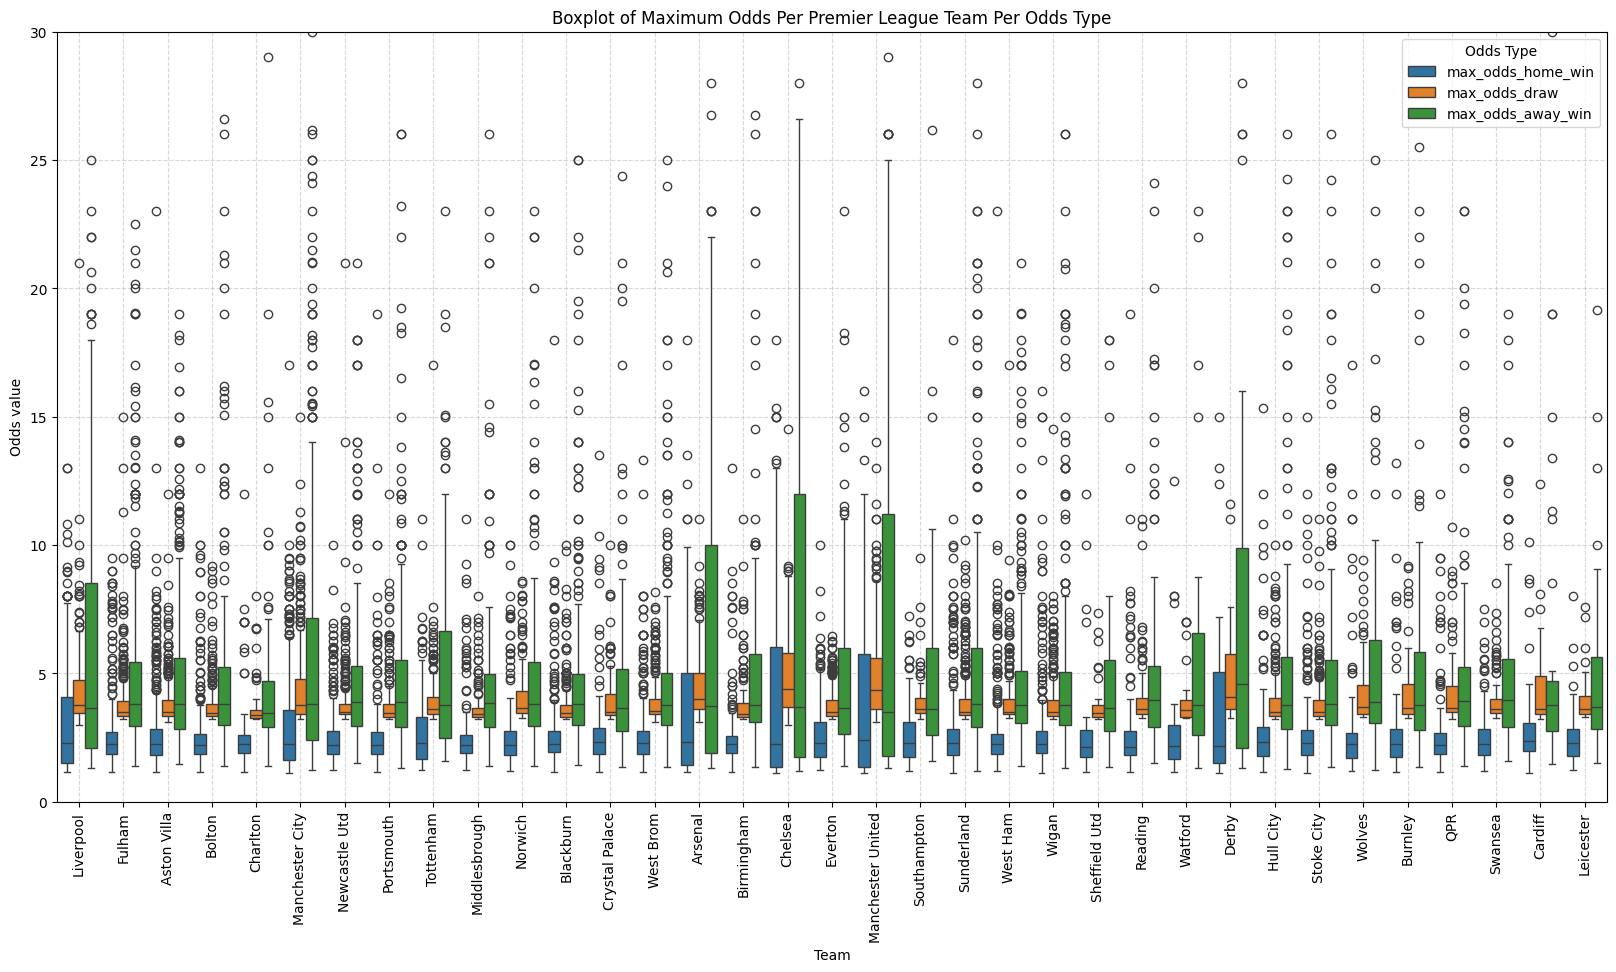

In [333]:
# Plot the data
y_min = 0
y_max = 30

plt.figure(figsize=(20, 10))
sns.boxplot(data=odds_melted_max, x="team", y="Maximum Odds", hue="Odds Type")

plt.xticks(rotation=90)
plt.xlabel("Team")
plt.ylabel("Odds value")
plt.title("Boxplot of Maximum Odds Per Premier League Team Per Odds Type")
plt.legend(title="Odds Type")
plt.ylim(y_min, y_max)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

We can again as before observe that the odds for the home team win are lower than the draw odd which is generally lower than the away team win, even when comparing them on the team level.

Below we plotted also Heatmaps for the teams from Premier League.

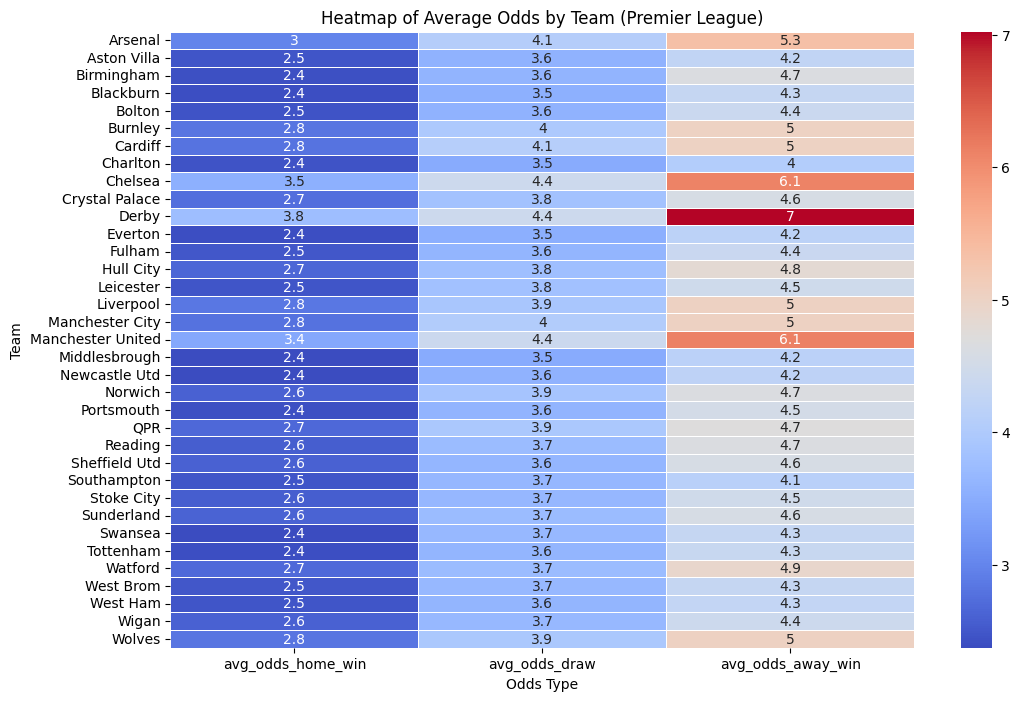

In [334]:
# Heatmap of average odds by team in Premier League
avg_odds_per_team = teams.groupby("team")[['avg_odds_home_win', 'avg_odds_draw', 'avg_odds_away_win']].mean()

plt.figure(figsize=(12, 8))
sns.heatmap(avg_odds_per_team, annot=True, cmap="coolwarm", linewidths=0.5)
plt.xlabel("Odds Type")
plt.ylabel("Team")
plt.title("Heatmap of Average Odds by Team (Premier League)")
plt.show()

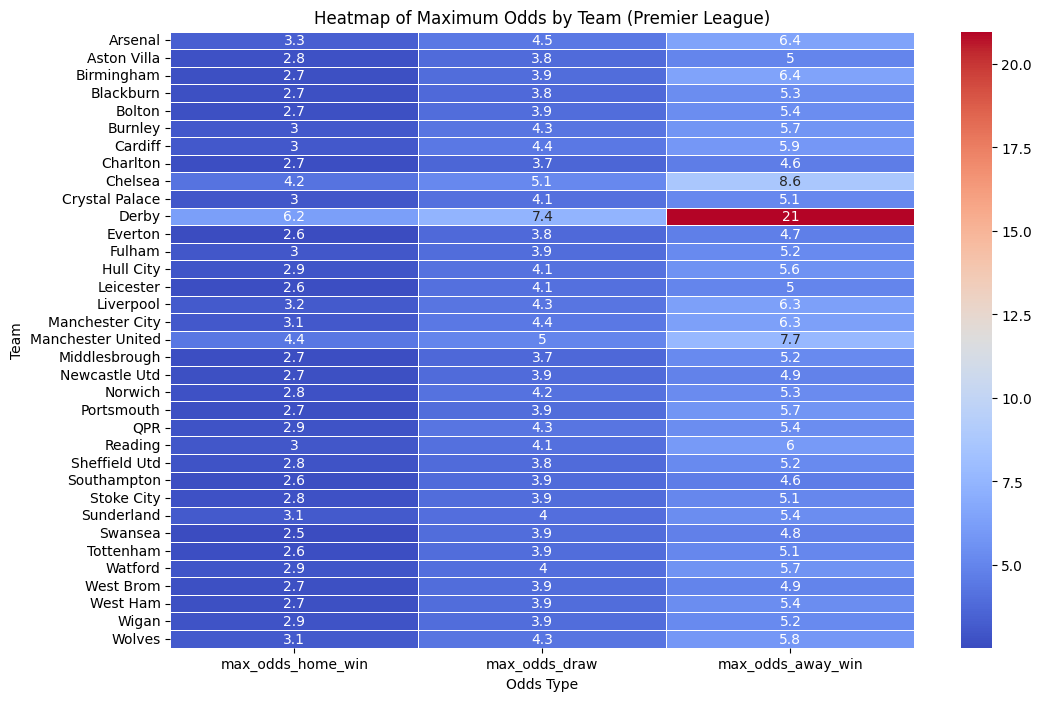

In [335]:
# Heatmap of average odds by team in Premier League
avg_odds_per_team_max = teams_max.groupby("team")[['max_odds_home_win', 'max_odds_draw', 'max_odds_away_win']].mean()

plt.figure(figsize=(12, 8))
sns.heatmap(avg_odds_per_team_max, annot=True, cmap="coolwarm", linewidths=0.5)
plt.xlabel("Odds Type")
plt.ylabel("Team")
plt.title("Heatmap of Maximum Odds by Team (Premier League)")
plt.show()

Below we graph the count of top bookie per bookmaker.

In [336]:
# occurrences of top bookmakers per odds type
top_bookie_counts = pd.DataFrame({
    "Home Win": data['top_bookie_home_win'].value_counts(),
    "Draw": data['top_bookie_draw'].value_counts(),
    "Away Win": data['top_bookie_away_win'].value_counts()
}).fillna(0)

top_bookie_counts = top_bookie_counts.reset_index().rename(columns={'index': 'Bookmaker'})
top_bookie_melted = top_bookie_counts.melt(id_vars="Bookmaker", var_name="Odds Type", value_name="Count")

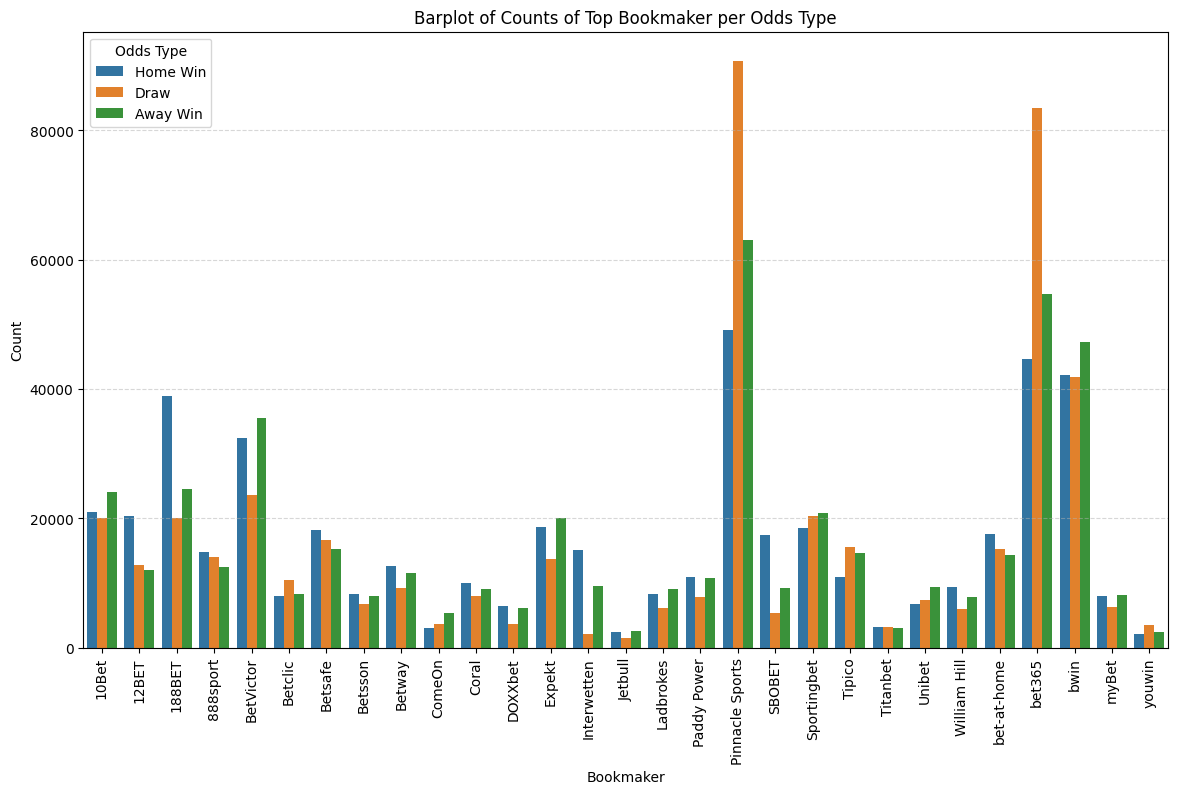

In [337]:
# Plot distribution of counts of top bookies per odds type
plt.figure(figsize=(14, 8))
sns.barplot(data=top_bookie_melted, x="Bookmaker", y="Count", hue="Odds Type")

plt.xticks(rotation=90)
plt.xlabel("Bookmaker")
plt.ylabel("Count")
plt.title("Barplot of Counts of Top Bookmaker per Odds Type")
plt.legend(title="Odds Type")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

We can notice that there are 3 bookies that were significantlly more commonly chosen as top bookie than the others - Pinnacle Sports, bet356 and bwin. This doesn't play a huge role for us, as we won't have any odds available in our model, but it would probably still be interesting to see which bookie provided the odds for the matches that model will correctly identify and if the trend corresponded to the graph above.

Scatterplot of unexpected away wins, where avg_odds_away_win had to be at least 5, in order for a match to count as a unexpected win.

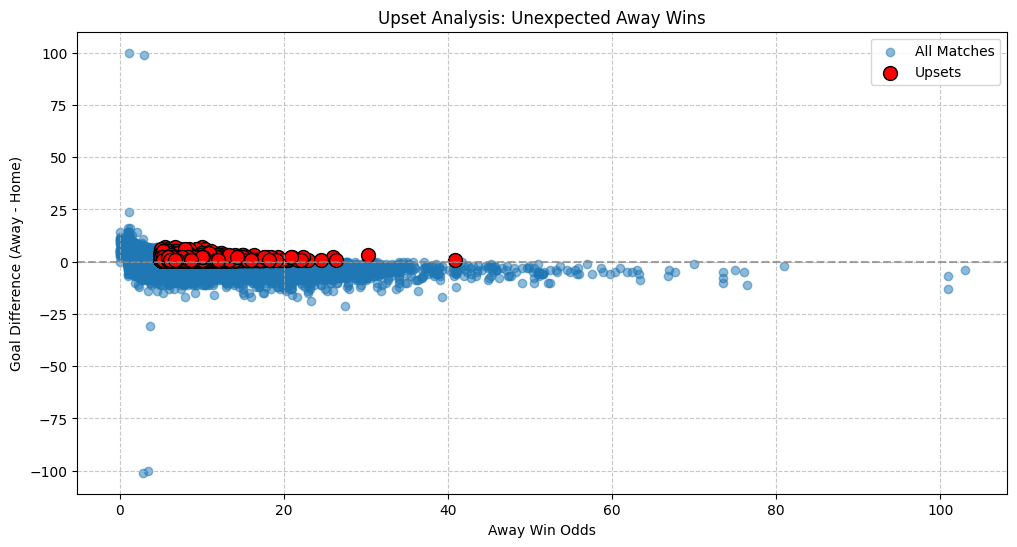

In [338]:
# Define threshold for upsets (e.g., away win odds > 5 and away team won)
upsets = data[(data['avg_odds_away_win'] > 5) & (data['away_score'] > data['home_score'])]

# Scatter plot of odds vs. result (highlighting upsets)
plt.figure(figsize=(12, 6))
plt.scatter(data['avg_odds_away_win'], data['away_score'] - data['home_score'], alpha=0.5, label="All Matches")
plt.scatter(upsets['avg_odds_away_win'], upsets['away_score'] - upsets['home_score'], color='red', label="Upsets", edgecolors='black', s=100)
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.7)
plt.xlabel("Away Win Odds")
plt.ylabel("Goal Difference (Away - Home)")
plt.title("Upset Analysis: Unexpected Away Wins")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Finally we plot the percentage of matches over time, where max odds exceeded the threshold presented in the paper, e.g. for home matches meaning: 

max_odds_home_win > 1/(p_cons_home−0.05).

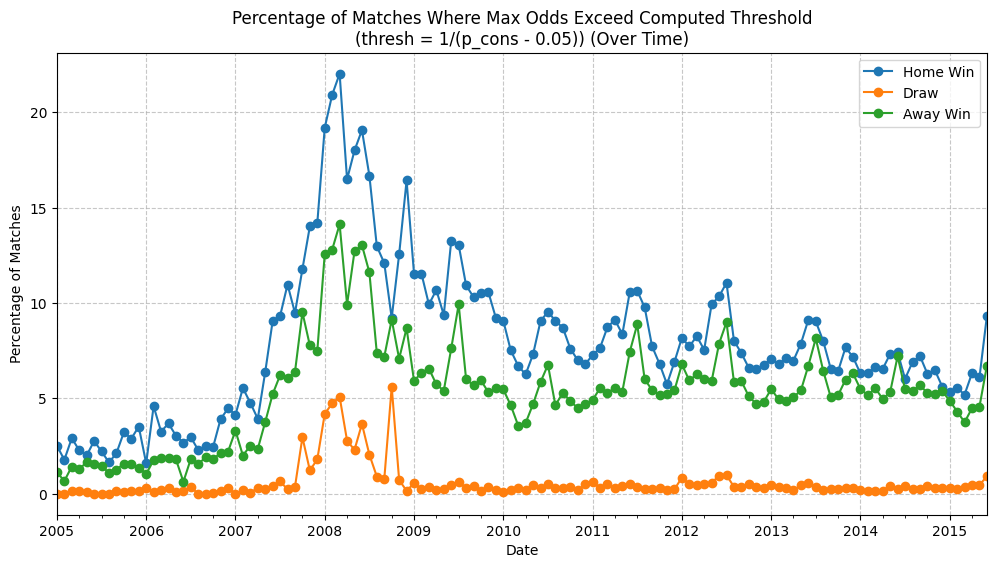

In [339]:
# Home win:
data['p_cons_home'] = 1 / data['avg_odds_home_win']
data['thresh_home'] = 1 / (data['p_cons_home'] - 0.05)
# Fdraw:
data['p_cons_draw'] = 1 / data['avg_odds_draw']
data['thresh_draw'] = 1 / (data['p_cons_draw'] - 0.05)
# Away win:
data['p_cons_away'] = 1 / data['avg_odds_away_win']
data['thresh_away'] = 1 / (data['p_cons_away'] - 0.05)

# compare max odds to threshold
data['home_win_spike'] = data['max_odds_home_win'] > data['thresh_home']
data['draw_spike']     = data['max_odds_draw']     > data['thresh_draw']
data['away_win_spike'] = data['max_odds_away_win'] > data['thresh_away']

data['match_month'] = data['match_date'].dt.to_period('M')

# calculate total times and percantages max odds exceeded threshold
historical_counts = data.groupby('match_month')[['home_win_spike', 'draw_spike', 'away_win_spike']].sum()
total_matches_per_month = data.groupby('match_month').size()
historical_percentage = (historical_counts.T / total_matches_per_month).T * 100
historical_percentage.index = historical_percentage.index.to_timestamp()

# plot the results per month
plt.figure(figsize=(12, 6))
historical_percentage.plot(ax=plt.gca(), marker='o', linestyle='-')

plt.xlabel("Date")
plt.ylabel("Percentage of Matches")
plt.title("Percentage of Matches Where Max Odds Exceed Computed Threshold\n(thresh = 1/(p_cons - 0.05)) (Over Time)")
plt.legend(["Home Win", "Draw", "Away Win"])
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

We can notice that there was an interesting period starting just before 2008 and lasting until the end of 2009 when the percentage of matches where max odds exceeded threshold rose drastically. Reason for this is unknown from the data but it would be interesting to check it historically what has happened in that period. Apart from that we can observe that in general home_win odds are historically the most overvalued, followed closely by away win odds. The occurances when draw odds are mispriced seem to be relatively rare. The percentage trend is very consistent throughout the observed period, especially from 2009 onwards.

### 3. Preprocessing the data for modelling

We first have to determine the target variable for the probability model. The target will be an indicator with value of 1 if a match would be chosen by a model in the past and 0 else. We will calculate the indicator as in the paper. We first use average odds to compute the consensus probability (for every bet type - home win, draw, away win). Then we calculate threshold value as 1/(p_cons - 0.05) again for every bet. We finally compare max_odds with calculated threshold - if max_odds are larger than threshold we set the odds_type_indicator to 1 and else to 0. In order to get the probability that a match will be picked by the betting strategy, we will set the target variable indicator to 1 in all the rows where any of the odds_type_indicator is equal to 1.

Before training the model we will keep only the variables that include information about the match before it actually starts (such as league, date, teams) and drop all the others. We will also remove all the rows with missing values and rows where the number of bookies offering odds is equal or smaller than 3 (like in the paper). At this point we will also split the dataset into 2 groups - train and test set. We wil be performing all of the calculations and parameter tuning on our train dataset and only check effectiveness of our final model (using AUC measure) on the test dataset. We will split the data in-time - all of the matches from the train data will have match_date earlier than any given match from test data.

We will also try to construct some new features that will provide us with information about team form (average goals scored, win/loss record, etc.) up to the match date, transform match_date into seasonal component (season, month, day-of-week) and try to find some trends. We will convert categorical variables into numerical if possible with one-hot-encoding, if not we will find another way.

We will use XGBoost as our base model, because it is known for its high predictive accuracy, speed and effectiveness. We will evaluate our model using AUC metric and use cross-validation with time-based split.

In [340]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import TimeSeriesSplit, train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import roc_auc_score, classification_report, roc_curve
import matplotlib.pyplot as plt

In [341]:
# reload the data to get fresh datset
data = pd.read_csv('data/closing_odds.csv')
data['match_date'] = pd.to_datetime(data['match_date'])
data

,match_id,league,match_date,home_team,home_score,away_team,away_score,avg_odds_home_win,avg_odds_draw,avg_odds_away_win,max_odds_home_win,max_odds_draw,max_odds_away_win,top_bookie_home_win,top_bookie_draw,top_bookie_away_win,n_odds_home_win,n_odds_draw,n_odds_away_win
0,170088,England: Premier League,2005-01-01,Liverpool,0,Chelsea,1,2.9944,3.1944,2.2256,3.20,3.25,2.29,Paddy Power,Sportingbet,Expekt,9,9,9
1,170089,England: Premier League,2005-01-01,Fulham,3,Crystal Palace,1,1.9456,3.2333,3.6722,2.04,3.30,4.15,Pinnacle Sports,bet-at-home,Expekt,9,9,9
2,170090,England: Premier League,2005-01-01,Aston Villa,1,Blackburn,0,1.8522,3.2611,4.0144,2.00,3.40,4.50,Pinnacle Sports,Paddy Power,Sportingbet,9,9,9
3,170091,England: Premier League,2005-01-01,Bolton,1,West Brom,1,1.6122,3.4133,5.4722,1.67,3.57,6.27,Coral,Pinnacle Sports,Pinnacle Sports,9,9,9
4,170092,England: Premier League,2005-01-01,Charlton,1,Arsenal,3,5.9878,3.4778,1.5567,7.00,3.60,1.62,Expekt,Paddy Power,bet365,9,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479435,876806,World: Club Friendly,2015-06-30,St. Gallen,1,Wacker Innsbruck,2,1.6838,3.8846,3.9813,1.83,4.20,4.33,188BET,bet365,Ladbrokes,24,24,24
479436,876807,World: Club Friendly,2015-06-30,SW Harelbeke,1,Waregem,1,13.1165,7.8229,1.1053,19.00,9.00,1.13,BetVictor,bet365,Titanbet,17,17,17
479437,876808,World: Club Friendly,2015-06-30,Torhout,0,Club Brugge,5,17.2256,12.6231,1.0288,22.00,15.00,1.05,BetVictor,Jetbull,BetVictor,16,16,16
479438,876809,World: Club Friendly,2015-06-30,Tournai,0,Mouscron Peruwelz,3,15.7143,10.2857,1.0614,34.00,12.00,1.10,Sportingbet,Betclic,Paddy Power,7,7,7


Step 1: Create odds indicator by odds type, and general target variable 'pick'.

In [342]:
# Create odds_type_indicator variables
# home win
p_cons_home = 1 / data['avg_odds_home_win']
thresh_home = 1 / (p_cons_home - 0.05)
data['pick_home'] = (data['max_odds_home_win'] > thresh_home).astype(int)

# draw:
p_cons_draw = 1 / data['avg_odds_draw']
thresh_draw = 1 / (p_cons_draw - 0.05)
data['pick_draw'] = (data['max_odds_draw'] > thresh_draw).astype(int)

# away win:
p_cons_away = 1 / data['avg_odds_away_win']
thresh_away = 1 / (p_cons_away - 0.05)
data['pick_away'] = (data['max_odds_away_win'] > thresh_away).astype(int)

# The overall target: 1 if any of the odds_type indicators is 1, else 0.
data['pick'] = ((data['pick_home'] + data['pick_draw'] + data['pick_away']) > 0).astype(int)
data

,match_id,league,match_date,home_team,home_score,away_team,away_score,avg_odds_home_win,avg_odds_draw,avg_odds_away_win,...,top_bookie_home_win,top_bookie_draw,top_bookie_away_win,n_odds_home_win,n_odds_draw,n_odds_away_win,pick_home,pick_draw,pick_away,pick
0,170088,England: Premier League,2005-01-01,Liverpool,0,Chelsea,1,2.9944,3.1944,2.2256,...,Paddy Power,Sportingbet,Expekt,9,9,9,0,0,0,0
1,170089,England: Premier League,2005-01-01,Fulham,3,Crystal Palace,1,1.9456,3.2333,3.6722,...,Pinnacle Sports,bet-at-home,Expekt,9,9,9,0,0,0,0
2,170090,England: Premier League,2005-01-01,Aston Villa,1,Blackburn,0,1.8522,3.2611,4.0144,...,Pinnacle Sports,Paddy Power,Sportingbet,9,9,9,0,0,0,0
3,170091,England: Premier League,2005-01-01,Bolton,1,West Brom,1,1.6122,3.4133,5.4722,...,Coral,Pinnacle Sports,Pinnacle Sports,9,9,9,0,0,0,0
4,170092,England: Premier League,2005-01-01,Charlton,1,Arsenal,3,5.9878,3.4778,1.5567,...,Expekt,Paddy Power,bet365,9,9,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479435,876806,World: Club Friendly,2015-06-30,St. Gallen,1,Wacker Innsbruck,2,1.6838,3.8846,3.9813,...,188BET,bet365,Ladbrokes,24,24,24,0,0,0,0
479436,876807,World: Club Friendly,2015-06-30,SW Harelbeke,1,Waregem,1,13.1165,7.8229,1.1053,...,BetVictor,bet365,Titanbet,17,17,17,0,0,0,0
479437,876808,World: Club Friendly,2015-06-30,Torhout,0,Club Brugge,5,17.2256,12.6231,1.0288,...,BetVictor,Jetbull,BetVictor,16,16,16,0,0,0,0
479438,876809,World: Club Friendly,2015-06-30,Tournai,0,Mouscron Peruwelz,3,15.7143,10.2857,1.0614,...,Sportingbet,Betclic,Paddy Power,7,7,7,0,0,0,0


Step 2: Keep only the columns that contain the information that we have before the match.

In [343]:
# Keep: league, match_date, home_team, away_team, and the target variable 'pick'
df_model = data[['league', 'match_date', 'home_team', 'away_team', 'pick',
               'n_odds_home_win', 'n_odds_draw', 'n_odds_away_win',
               # we keep features below to compute additional variables from them later
               'home_score', 'away_score']].copy()

# remove rows with missing values and number of bookmakers offering odds is <= 3
df_model = df_model.dropna()
df_model = df_model[(df_model['n_odds_home_win'] > 3) &
                    (df_model['n_odds_draw'] > 3) &
                    (df_model['n_odds_away_win'] > 3)].copy()

In [344]:
df_model[df_model['pick'] == 1].shape[0]/df_model.shape[0]

0.13515674057459573

We can notice that strategy from the paper would pick approximately 13 % of all the matches.

Step 3: Feature engineering - seasonal componets

In [345]:
df_model['season'] = df_model['match_date'].dt.year 
df_model['month'] = df_model['match_date'].dt.month
df_model['day_of_week'] = df_model['match_date'].dt.dayofweek

Step 3: Feature engineering - number of odds per match. If all the values in the columns n_odds_home_win, n_odds_draw, and n_odds_away_win are the same (all the bookies offer odds for each result), then that number is used. Otherwise the mean of the 3 columns is used.

In [346]:
equal_odds = (
    (df_model['n_odds_home_win'] == df_model['n_odds_draw']) &
    (df_model['n_odds_draw'] == df_model['n_odds_away_win'])
)

if equal_odds.all():
    print("All rows have the same values in n_odds_home_win, n_odds_draw, and n_odds_away_win.")
    df_model['n_odds'] = df_model['n_odds_home_win']
else:
    print("Not all rows have the same values in the odds columns. Using the average of the three columns.")
    # else compute the average of the three columns.
    df_model['n_odds'] = df_model[['n_odds_home_win', 'n_odds_draw', 'n_odds_away_win']].mean(axis=1)

Not all rows have the same values in the odds columns. Using the average of the three columns.


Step 3: Feature engineering - average goals scored before each match. Calculate the running average, up to the moment of a given match. Fill missing values with 0.

In [347]:
df_model = df_model.sort_values('match_date')

home_avg_goals_list = []
away_avg_goals_list = []

# Create dictionaries for cumulative stats for each team.
team_goals = {}  # key: team name, value: list of goals scored

# iterate over the matches in time order.
for idx, row in df_model.iterrows():
    home = row['home_team']
    away = row['away_team']
    
    # home team
    if home in team_goals and len(team_goals[home]) > 0:
        home_avg = np.mean(team_goals[home])
    else:
        home_avg = np.nan
    home_avg_goals_list.append(home_avg)
    
    # away team
    if away in team_goals and len(team_goals[away]) > 0:
        away_avg = np.mean(team_goals[away])
    else:
        away_avg = np.nan
    away_avg_goals_list.append(away_avg)
    
    # For home team, add goals scored at home, for away team add goals scored away
    team_goals.setdefault(home, []).append(row['home_score'])
    team_goals.setdefault(away, []).append(row['away_score'])

df_model['home_team_avg_goals'] = home_avg_goals_list
df_model['away_team_avg_goals'] = away_avg_goals_list

# Fill missing values with zero
df_model['home_team_avg_goals'] = df_model['home_team_avg_goals'].fillna(0)
df_model['away_team_avg_goals'] = df_model['away_team_avg_goals'].fillna(0)

Step 3: Feature engineering - win/loss ratio before the match. Calculate the running ratio, up to the moment of a given match. Fill missing values with 0.

In [348]:
df_model = df_model.sort_values('match_date')

home_win_loss_list = []
away_win_loss_list = []

# Dictionaries to keep cumulative win/loss stats for each team.
team_wins = {}    # key: team name, value: cumulative wins
team_losses = {}  # key: team name, value: cumulative losses

# iterate over the matches in time order.
for idx, row in df_model.iterrows():
    home = row['home_team']
    away = row['away_team']
    
    # Home team:
    wins_home = team_wins.get(home, 0)
    losses_home = team_losses.get(home, 0)
    
    # Compute the home team's win/loss ratio.
    # If the team hasn't played yet, set ratio to NaN.
    # If losses are 0 but wins exist, use wins as the ratio.
    if wins_home == 0 and losses_home == 0:
        home_ratio = np.nan
    elif losses_home == 0:
        home_ratio = wins_home
    else:
        home_ratio = wins_home / losses_home
    home_win_loss_list.append(home_ratio)
    
    # Away team:
    wins_away = team_wins.get(away, 0)
    losses_away = team_losses.get(away, 0)
    
    if wins_away == 0 and losses_away == 0:
        away_ratio = np.nan
    elif losses_away == 0:
        away_ratio = wins_away
    else:
        away_ratio = wins_away / losses_away
    away_win_loss_list.append(away_ratio)
    

    home_score = row['home_score']
    away_score = row['away_score']
    
    if home_score > away_score:
        # Home win:
        team_wins[home] = team_wins.get(home, 0) + 1
        team_losses[away] = team_losses.get(away, 0) + 1
    elif home_score < away_score:
        # Away win:
        team_wins[away] = team_wins.get(away, 0) + 1
        team_losses[home] = team_losses.get(home, 0) + 1
    # For a draw, no changes are made.

df_model['home_team_win_loss_ratio'] = home_win_loss_list
df_model['away_team_win_loss_ratio'] = away_win_loss_list

# Fill missing values with 0
df_model['home_team_win_loss_ratio'] = df_model['home_team_win_loss_ratio'].fillna(0)
df_model['away_team_win_loss_ratio'] = df_model['away_team_win_loss_ratio'].fillna(0)

Step 4: Select final features for the model.

In [349]:
df_final = df_model[['league', 'match_date', 'home_team', 'away_team', 
                     'season', 'month', 'day_of_week', 
                     'home_team_avg_goals', 'away_team_avg_goals',
                     'home_team_win_loss_ratio', 'away_team_win_loss_ratio',
                     'n_odds',    # new odds feature
                     'pick']].copy()

In [350]:
df_final

,league,match_date,home_team,away_team,season,month,day_of_week,home_team_avg_goals,away_team_avg_goals,home_team_win_loss_ratio,away_team_win_loss_ratio,n_odds,pick
0,England: Premier League,2005-01-01,Liverpool,Chelsea,2005,1,5,0.000000,0.000000,0.000000,0.000000,9.0,0
2,England: Premier League,2005-01-01,Aston Villa,Blackburn,2005,1,5,0.000000,0.000000,0.000000,0.000000,9.0,0
3,England: Premier League,2005-01-01,Bolton,West Brom,2005,1,5,0.000000,0.000000,0.000000,0.000000,9.0,0
4,England: Premier League,2005-01-01,Charlton,Arsenal,2005,1,5,0.000000,0.000000,0.000000,0.000000,9.0,0
5,England: Premier League,2005-01-01,Manchester City,Southampton,2005,1,5,0.000000,0.000000,0.000000,0.000000,9.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
479437,World: Club Friendly,2015-06-30,Torhout,Club Brugge,2015,6,1,1.126316,1.776786,0.871795,2.092857,16.0,0
479413,World: Club Friendly,2015-06-30,Fortuna Köln,Kassel,2015,6,1,1.000000,1.554054,1.000000,1.318681,28.0,1
479426,World: Club Friendly,2015-06-30,Chemnitzer,Neustrelitz,2015,6,1,1.500000,1.630252,1.000000,1.410256,27.0,0
479438,World: Club Friendly,2015-06-30,Tournai,Mouscron Peruwelz,2015,6,1,1.257426,1.440945,0.735632,1.657895,7.0,0


Split features into train and test set based on time. We decided to use all of the matches up to 2015 as our training data and all of the matches in 2015 as our test data.

In [351]:
cutoff_date = '2015-01-01'

# Split the data: training set contains matches with match_date before 2015-01-01,
# test set contains matches with match_date on or after 2015-01-01.
train_mask = df_final['match_date'] < cutoff_date
test_mask = df_final['match_date'] >= cutoff_date

df_train = df_final.loc[train_mask].copy()
df_test = df_final.loc[test_mask].copy()

# remove match date as we have all the necessary info in other variables
df_train = df_train.drop('match_date', axis=1)
df_test  = df_test.drop('match_date', axis=1)

# Separate features and target variable.
features = ['league', 'home_team', 'away_team', 'season', 'month', 'day_of_week', 
            'home_team_avg_goals', 'away_team_avg_goals',
            'home_team_win_loss_ratio', 'away_team_win_loss_ratio', 'n_odds']

X_train = df_train[features]
y_train = df_train['pick']
X_test  = df_test[features]
y_test  = df_test['pick']

As there are a lot of unique values in categorical variables the use of one-hot-encoding with pandas.get_dummy wasn't possible - we tried it and ran into memory issues. We are guessing that with more time and computing power we would be also able to run it this way. For this reasons we decided to use label encoding to transform categorical features into numerical. This should work fine, because the order of leagues and teams is not important and seasonal variables are already numerical. It it also not ideal as now categorical values will be asigned random values (from 1 to number of unique values in the variable), while the proper way would be to do one-hot-encoding. Still we proceed. Additionally as there can be unknown categories in test set (new teams, leagues) we categorize them with -1.

In [352]:
# categorical features to adapt
categorical_features = ['league', 'home_team', 'away_team']

X_train_le = X_train.copy()
X_test_le = X_test.copy()

# Use label encoding on each categorical feature, assigning -1 for unknown categories in test set.
for col in categorical_features:
    le = LabelEncoder()
    # Fit the encoder on the training data and create the encoded column
    X_train_le[col + '_encoded'] = le.fit_transform(X_train_le[col])
    mapping = {label: idx for idx, label in enumerate(le.classes_)}
    
    # For the test set, apply the mapping: if the category is not found, assign -1.
    X_test_le[col + '_encoded'] = X_test_le[col].apply(lambda x: mapping.get(x, -1))

# Drop the original categorical columns from both training and test sets
X_train_le = X_train_le.drop(columns=categorical_features)
X_test_le = X_test_le.drop(columns=categorical_features)

numeric_features = ['season', 'month', 'day_of_week',
                    'home_team_avg_goals', 'away_team_avg_goals', 
                    'home_team_win_loss_ratio', 'away_team_win_loss_ratio']


# Convert DataFrames to numpy arrays for modeling
X_train_final = X_train_le.values
X_test_final = X_test_le.values

### 4. Model training with XGBoost

We chose XGBoost, as it is a tree-based gradient boosting algorithm and is known for fast and effective classification tasks and its high predictive accuracy and scalability.

In [353]:
clf_xgb = xgb.XGBClassifier(
    n_estimators=500,      # Number of trees
    max_depth=5,           # Maximum depth of each tree
    learning_rate=0.05,     # Learning rate
    eval_metric='auc'      # AUC as the evaluation metric
)

tscv = TimeSeriesSplit(n_splits=5)
cv_scores = cross_val_score(clf_xgb, X_train_final, y_train, cv=tscv, scoring='roc_auc')
print("Cross-validated AUC scores on training set (XGBoost):", cv_scores)
print("Mean CV AUC (XGBoost):", np.mean(cv_scores))

clf_xgb.fit(X_train_final, y_train)

Cross-validated AUC scores on training set (XGBoost): [0.61455891 0.61764317 0.63410661 0.65191192 0.65050139]
Mean CV AUC (XGBoost): 0.6337443998934351


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

The AUC value on a randomly selected hyperparameters of the XGBoost model already produced a satisfactory result - AUC value of 0.63 on the train set. We could further optimize the hyperparameter values selection, by training the model on different combinations of hyperparameter values, do cross validation for each combination and calculate the AUC. We could also compare this model with other models such as random forests, LightGBM, logistic regression, Bayesian networks or neural networks to see if we can improve the AUC on the training set. However, due to the time and computational constraints and the fact that acheiving the highest possible AUC value is not a top priority, we have decided to be satisfied with the result of the current model and at this point just calculate its AUC value on the test set.

Test AUC score (XGBoost): 0.6548946741550428
Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     29053
           1       0.65      0.01      0.01      3462

    accuracy                           0.89     32515
   macro avg       0.77      0.50      0.48     32515
weighted avg       0.87      0.89      0.85     32515



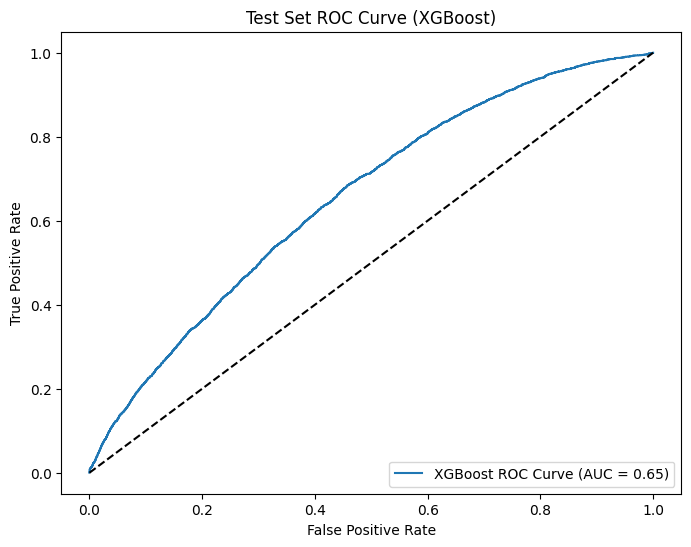

In [354]:
y_test_probs_xgb = clf_xgb.predict_proba(X_test_final)[:, 1]
test_auc_xgb = roc_auc_score(y_test, y_test_probs_xgb)
print("Test AUC score (XGBoost):", test_auc_xgb)
print("Classification Report (XGBoost):")
print(classification_report(y_test, clf_xgb.predict(X_test_final)))

fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_test_probs_xgb)
plt.figure(figsize=(8,6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost ROC Curve (AUC = {test_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Set ROC Curve (XGBoost)')
plt.legend(loc='lower right')
plt.show()

The XGBoost scored the AUC of 0.65 on the test set, which is even better result than on the train set. This means that the model constructed is not prone to overfitting and can confidently be used for predicting probability on new data.